# 基于神经网络的手写数字识别(二分类)

* 选用kernel learning_dl
~~~
conda activate learning_dl 

pip install autils

# conda remove --name learning_dl --all
# kill -9 +id
~~~

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

print("finish import module!!!")

finish import module!!!


In [ ]:
# 加载MNIST手写数字数据集 (http://yann.lecun.com/exdb/mnist/)
def load_data():
    X = np.load("data/X.npy")
    y = np.load("data/y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y

X, y = load_data()

print(f"dim of input feature: {X.shape}, and the output target: {y.shape}")
# 1000个样本，每个样本的特征是400, 每个样本的标签为1

dim of input feature: (1000, 400), and the output target: (1000, 1)


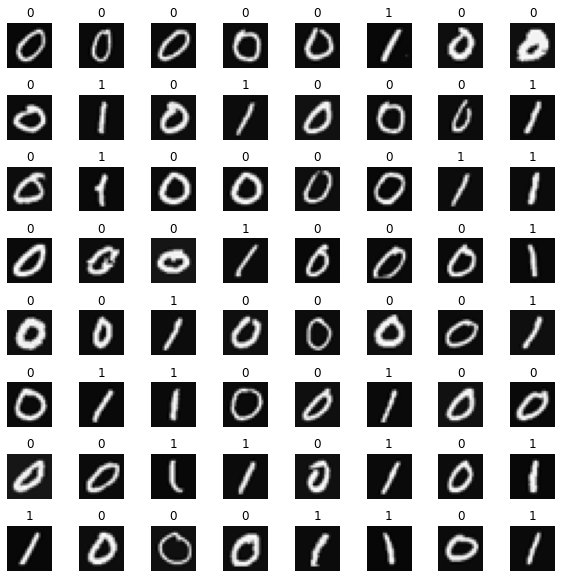

In [3]:
# 下面可视化一些数据(8*8=64个样本)可以看到全部都是0或者1
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [4]:
#定义模型
# GRADED CELL: Sequential model

model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #specify input size  (optional)
        ### START CODE HERE ### 

        Dense(25, activation='sigmoid'), 
        Dense(15, activation='sigmoid'), 
        Dense(1,  activation='sigmoid')  
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)   

model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                10025     
_________________________________________________________________
dense_4 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [6]:
# UNIT TESTS
from public_tests import * 

test_c1(model)#确保定义的模型是正确的

[layer1, layer2, layer3] = model.layers
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

All tests passed!
W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)
